# **Keras Cats vs Dogs - Treinamento usando seus próprios dados**

---

Nesta lição, aprenderemos como configurar geradores de dados para carregar nosso próprio conjunto de dados e treinar um classificador usando o Keras.
1. Baixe e explore nossos dados
2. Crie uma CNN simples
3. Crie nossos geradores de dados
4. Treine nosso modelo
5. Teste algumas inferências
6. Pontos de verificação

In [1]:
# import our packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2025-12-27 16:01:01.465075: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-27 16:01:01.496878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766862061.517480    3438 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766862061.528636    3438 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766862061.562236    3438 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
import sys
print(sys.executable)


/home/gabs/miniconda3/bin/python3.12


In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# Define our images sizes
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 60
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [5]:
train_dir = '/mnt/f/dogs-vs-cats/train/train'
test_dir = '/mnt/f/dogs-vs-cats/test1/test1'


train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

In [6]:

categories = []

for filename in train_files:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': train_files,
    'class': categories
})


In [7]:
df.head() #VERIFICANDO A CLASSE DOS GATOS

,filename,class
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [8]:
df.tail() #VERIFICANDO A CLASSE DOS CACHORROS

,filename,class
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


<Axes: xlabel='class'>

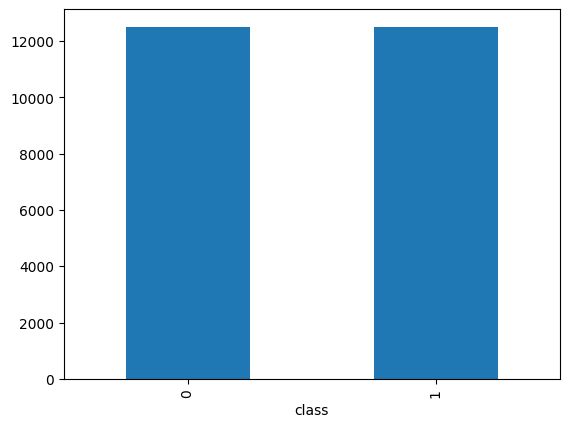

In [9]:
df['class'].value_counts().plot.bar() #CONTANDO A DISTRIBUIÇÃO DE INSTANCIAS POR CLASSE

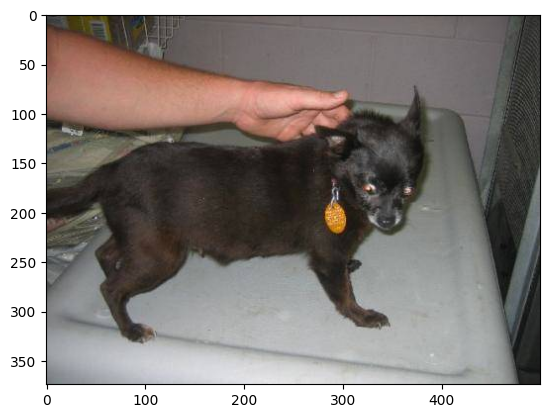

In [10]:
sample = random.choice(train_files)
image = load_img("/mnt/f/dogs-vs-cats/train/train/" + sample)
plt.imshow(image)

## CRIANDO O MODELO CNN

In [11]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax')) # 2 por que sao duas classes

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

/home/gabs/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1766862066.593428    3438 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5628 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 58, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,594 (1.78 MB)

 Trainable params: 466,594 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

## Criando um gerador de dados para treino e teste.

In [14]:
df['class'] = df['class'].replace({0: 'cat', 1: 'dog'}) #trocando 0 por cat e 1 por dog.


In [17]:
df.head()

,filename,class
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [18]:
df.tail()

,filename,class
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog
24999,dog.9999.jpg,dog


In [20]:
#DIVIDINDO O DATASET 

train_df, validate_df = train_test_split(df, test_size = 0.20, random_state = 7)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [21]:
train_df.head()

,filename,class
0,cat.1676.jpg,cat
1,dog.4408.jpg,dog
2,cat.2768.jpg,cat
3,dog.4840.jpg,dog
4,cat.4622.jpg,cat


In [22]:
validate_df.head()

,filename,class
0,dog.7075.jpg,dog
1,cat.5235.jpg,cat
2,dog.2850.jpg,dog
3,dog.6177.jpg,dog
4,dog.7753.jpg,dog


In [23]:
batch_size = 32

#GERADOR DE TREINO

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(

    train_df, 
    "/mnt/f/dogs-vs-cats/train/train/",
    x_col = 'filename',
    y_col = 'class',
    target_size = IMAGE_SIZE, 
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [40]:
#GERADOR DE VALIDAÇÃO (SUB-SET DO CONJUNTO DE TREINO)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/mnt/f/dogs-vs-cats/train/train/", 
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [28]:
# EXEMPLO DE GERADOR PARA UMA UNICA IMAGEM

example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/mnt/f/dogs-vs-cats/train/train/", 
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


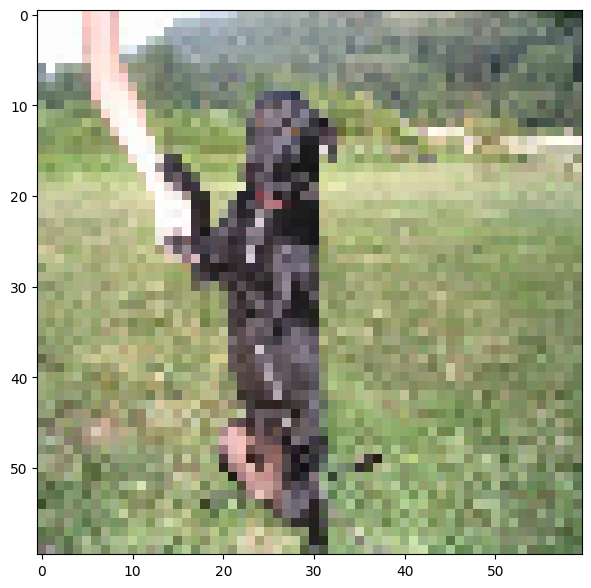

In [29]:
plt.figure(figsize=(6, 6))

for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    plt.imshow(image)
    break

plt.tight_layout()
plt.show()

## CRIANDO CALLBACKS



In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau



In [33]:
checkpoint = ModelCheckpoint("catsVsdogs.weights.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

In [34]:
earlystop = EarlyStopping(monitor = 'val_loss', # valor a ser monitorado para melhoramento
                          min_delta = 0, 
                          patience = 5, # Numero de épocas limite sem haver mudanças na loss
                          verbose = 1,
                          restore_best_weights = True)

In [35]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

In [36]:
callbacks = [earlystop, checkpoint, reduce_lr]

## FAZENDO O TREINO

In [37]:
epochs = 10

history = model.fit(
    train_generator, 
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = 5000//batch_size,
    steps_per_epoch = 20000//batch_size,
)

/home/gabs/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1766869947.154140    3514 service.cc:152] XLA service 0x738d7c00cf40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766869947.154530    3514 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-12-27 18:12:27.280878: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1766869947.645376    3514 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-12-27 18:12:28.350148: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_744', 4 bytes spill stores, 4 bytes spill loads



  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:02:22 6s/step - accuracy: 0.4375 - loss: 0.7040

I0000 00:00:1766869951.337968    3514 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - accuracy: 0.5826 - loss: 0.6597
Epoch 1: val_loss improved from inf to 0.57581, saving model to catsVsdogs.weights.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 469s 743ms/step - accuracy: 0.5827 - loss: 0.6597 - val_accuracy: 0.6985 - val_loss: 0.5758 - learning_rate: 5.0000e-04
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7440 - loss: 0.5222
Epoch 2: val_loss improved from 0.57581 to 0.47143, saving model to catsVsdogs.weights.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.7440 - loss: 0.5222 - val_accuracy: 0.7746 - val_loss: 0.4714 - learning_rate: 5.0000e-04
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7826 - loss: 0.4539
Epoch 3: val_loss improved from 0.47143 to 0.42613, saving model to catsVsdogs.weights.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.7826 - loss: 0.4539 - val_accuracy: 0.8035 - val_loss: 0.4261 - learning_rate: 5.0000e-04
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8176 - loss: 0.3984
Epoch 4: val_loss did not improve from 0.42613
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.8176 - loss: 0.3984 - val_accuracy: 0.7879 - val_loss: 0.4450 - learning_rate: 5.0000e-04
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8430 - loss: 0.3571
Epoch 5: val_loss improved from 0.42613 to 0.40620, saving model to catsVsdogs.weights.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.8430 - loss: 0.3571 - val_accuracy: 0.8131 - val_loss: 0.4062 - learning_rate: 5.0000e-04
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8680 - loss: 0.3096
Epoch 6: val_loss did not improve from 0.40620
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.8680 - loss: 0.3096 - val_accuracy: 0.8105 - val_loss: 0.4143 - learning_rate: 5.0000e-04
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8834 - loss: 0.2699
Epoch 7: val_loss did not improve from 0.40620
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.8834 - loss: 0.2700 - val_accuracy: 0.8093 - val_loss: 0.4388 - learning_rate: 5.0000e-04
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9075 - loss: 0.2264
Epoch 8: val_loss did not improve from 0.40620

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.9075 - loss: 0.226

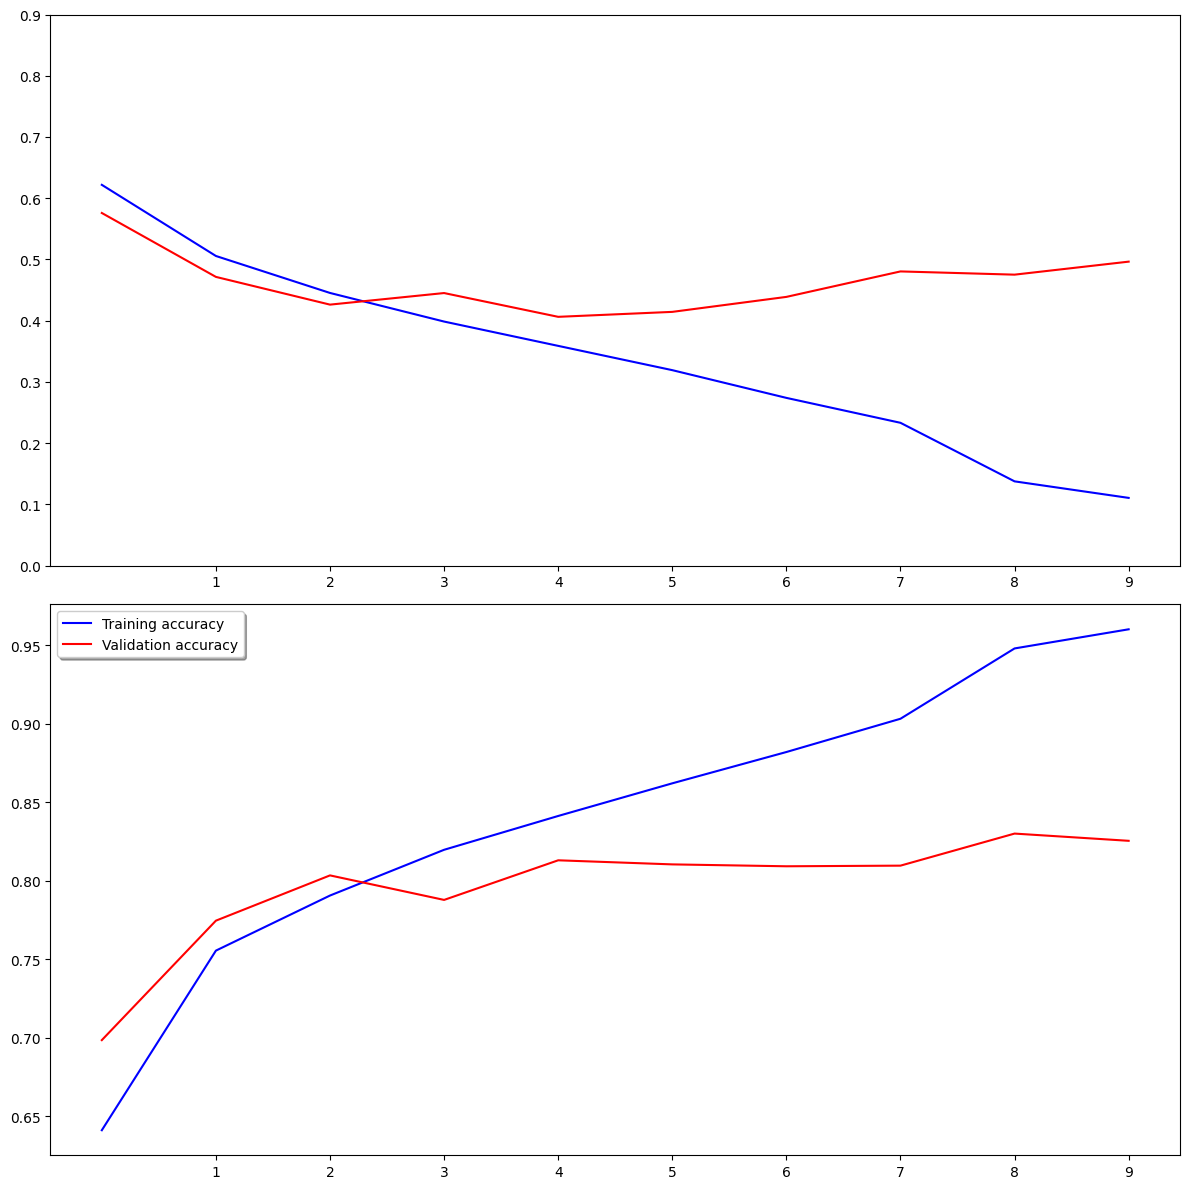

In [38]:
# Viewour for performance plots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## VALIDANDO O MODELO 

In [43]:
predict = model.predict(validation_generator, steps = int(np.ceil(5000/batch_size)))

157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 283ms/step


In [44]:
# PEGANDO AGORA AS PROBABILIDADES PREDITAS PELO MODELO PARA CADA CLASSE. USANDO ARGMAX PARA PEGAR A MAIOR.
validate_df['predicted'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
validate_df['predicted'] = validate_df['predicted'].replace(label_map)
validate_df

,filename,class,predicted
0,dog.7075.jpg,dog,dog
1,cat.5235.jpg,cat,cat
2,dog.2850.jpg,dog,dog
3,dog.6177.jpg,dog,dog
4,dog.7753.jpg,dog,dog
...,...,...,...
4995,dog.10210.jpg,dog,cat
4996,dog.3910.jpg,dog,cat
4997,cat.9777.jpg,cat,cat
4998,cat.1954.jpg,cat,dog


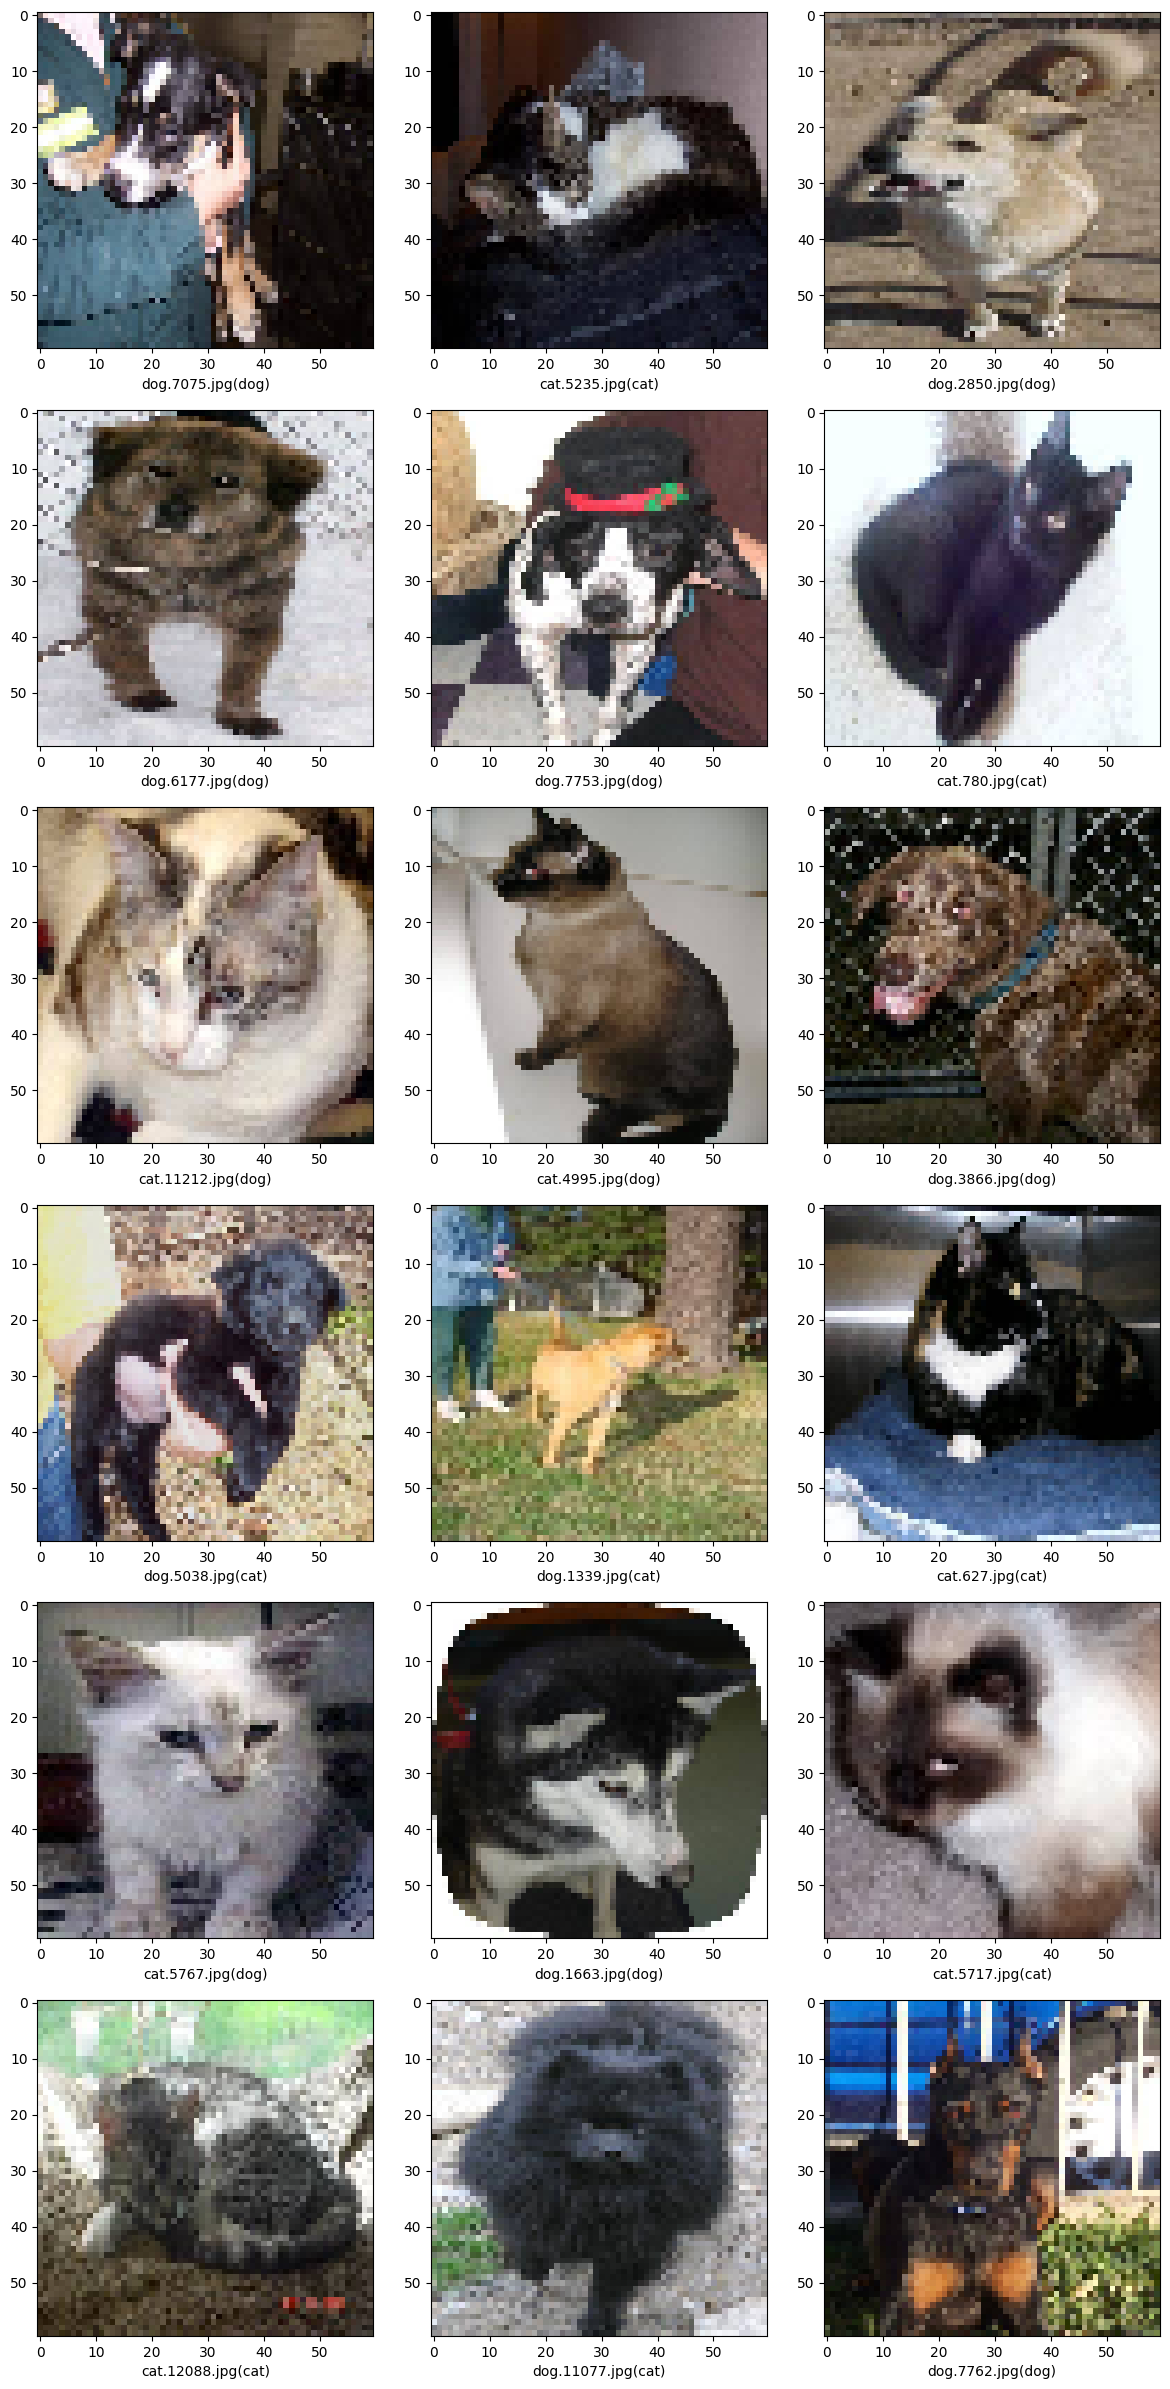

In [46]:
# FAZENDO A INFERENCIA SOBRE UM BATCH DO CONJUNTO DE VALIDAÇÃO
sample_test = validate_df.head(18)
sample_test.head()

plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['predicted']
    img = load_img("/mnt/f/dogs-vs-cats/train/train/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )

plt.tight_layout()
plt.show()